<a href="https://www.kaggle.com/code/bulbulbhati/car-parking?scriptVersionId=111184689" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Reference-https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

# Importing packages and libraries

In [1]:

import numpy as np # linear algebra #rgb values for images exist in a np array
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import PIL # Importing Image class from PIL module
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
#import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array



# Loading Data

In [2]:
data_path = "/kaggle/input/find-a-car-park/data/"
Categories = ["Free", "Full"]
img_size = 150


In [3]:
data = []

def create_data():    
    for category in Categories:
        path = os.path.join(data_path,category)
        class_num = Categories.index(category)
        print(path) #lepath to each category file
        for img in os.listdir(path):
            print(img) #path to each image in the category files
            img_arr = cv2.imread(os.path.join(path,img))
            new_img_arr = cv2.resize(img_arr,(img_size,img_size))
            data.append([new_img_arr,class_num])
create_data()   

/kaggle/input/find-a-car-park/data/Free
img_1007090558.jpg
img_1008134558.jpg
img_921195602.jpg
img_725130006.jpg
img_1006132058.jpg
img_725113006.jpg
img_913091058.jpg
img_1007180557.jpg
img_815174101.jpg
img_1007123057.jpg
img_818021602.jpg
img_1011141058.jpg
img_725133006.jpg
img_1017152558.jpg
img_1013041103.jpg
img_1008140058.jpg
img_816143558.jpg
img_915112557.jpg
img_901015602.jpg
img_1020140558.jpg
img_725180006.jpg
img_1016091058.jpg
img_1008135058.jpg
img_1008124558.jpg
img_817154058.jpg
img_915104058.jpg
img_823135738.jpg
img_1009093058.jpg
img_1007171557.jpg
img_1009094057.jpg
img_1009095057.jpg
img_911112558.jpg
img_724123006.jpg
img_1008161557.jpg
img_921202603.jpg
img_912074558.jpg
img_1013031103.jpg
img_802133006.jpg
img_915135558.jpg
img_1008150557.jpg
img_1011165558.jpg
img_1006151557.jpg
img_912161557.jpg
img_818045603.jpg
img_913180602.jpg
img_1006143058.jpg
img_1007102557.jpg
img_1009163057.jpg
img_817155558.jpg
img_901052603.jpg
img_818010602.jpg
img_912080058.jpg

Corrupt JPEG data: 1784 extraneous bytes before marker 0xd9


img_817151057.jpg
img_1007091558.jpg
img_1008104058.jpg
img_921185102.jpg
img_901011103.jpg
img_922160058.jpg
img_1006110058.jpg
img_1011134558.jpg
img_907075558.jpg
img_817080058.jpg
img_923080058.jpg
img_1006102557.jpg
img_1007104058.jpg
img_1011133557.jpg
img_808081558.jpg
img_901051102.jpg
img_815175102.jpg
img_1011161557.jpg
img_915135058.jpg
img_923081557.jpg
img_1006124558.jpg
img_912173058.jpg
img_817143058.jpg
img_818022602.jpg
img_1013082558.jpg
img_818005102.jpg
img_1007174058.jpg
img_814153250.jpg
img_818030102.jpg
img_823083558.jpg
img_1010140558.jpg
img_818023101.jpg
img_818014602.jpg
img_901145557.jpg
img_1006094558.jpg
img_923064558.jpg
img_801180006.jpg
img_1010084558.jpg
img_906063558.jpg
img_906071058.jpg
img_722103740.jpg
img_808081858.jpg
img_1006135558.jpg
img_1008160558.jpg
img_126211103.jpg
img_913072558.jpg
img_1007090058.jpg
img_914083557.jpg
img_128001103.jpg
img_1011141557.jpg
img_1006165058.jpg
img_1008142058.jpg
img_1018061557.jpg
img_130112557.jpg
img_912

Corrupt JPEG data: 686 extraneous bytes before marker 0xd9


img_925221602.jpg
img_902093558.jpg
img_1213212601.jpg
img_926052102.jpg
img_905002602.jpg
img_823182101.jpg
img_902012603.jpg
img_911011101.jpg
img_907011602.jpg
img_904183602.jpg


Corrupt JPEG data: 1304 extraneous bytes before marker 0xd9


img_823061101.jpg
img_928004602.jpg
img_824190602.jpg
img_906214602.jpg
img_1013130057.jpg
img_919075058.jpg
img_910230102.jpg
img_823181601.jpg
img_722083007.jpg
img_919032101.jpg
img_914185102.jpg
img_914010603.jpg
img_901171558.jpg
img_919123559.jpg
img_1002020102.jpg
img_910215602.jpg


Corrupt JPEG data: 1295 extraneous bytes before marker 0xd9


img_909114057.jpg
img_129055602.jpg
img_901164058.jpg
img_915015102.jpg
img_907044103.jpg
img_909174558.jpg
img_1005173558.jpg
img_904225602.jpg
img_907165058.jpg
img_129054602.jpg
img_906183602.jpg
img_1004062559.jpg
img_928013103.jpg
img_926173557.jpg
img_909221103.jpg
img_906231602.jpg
img_905161557.jpg
img_1020065058.jpg
img_129081557.jpg
img_912184602.jpg
img_912202602.jpg
img_906192102.jpg
img_919171558.jpg
img_927223102.jpg
img_919053103.jpg
img_722073007.jpg
img_824191602.jpg
img_1008095058.jpg
img_1007130058.jpg
img_906212602.jpg
img_129082058.jpg
img_915155057.jpg
img_904053602.jpg
img_915214103.jpg
img_904081558.jpg
img_902004102.jpg
img_923120058.jpg
img_901180102.jpg
img_923104557.jpg
img_1002015603.jpg
img_901200602.jpg
img_928002602.jpg
img_723203006.jpg
img_914055059.jpg
img_923120558.jpg
img_1005184558.jpg
img_1013134058.jpg
img_925055058.jpg
img_1002014602.jpg
img_902000102.jpg
img_1201220602.jpg
img_1008163558.jpg
img_907191603.jpg
img_809070058.jpg
img_914015102.jpg

Corrupt JPEG data: 220 extraneous bytes before marker 0xd9


img_909103558.jpg
img_919153058.jpg
img_809165058.jpg
img_906201602.jpg
img_1013133057.jpg
img_1202033102.jpg
img_822173058.jpg
img_919055059.jpg
img_920054558.jpg
img_1002103558.jpg
img_909150058.jpg
img_910205602.jpg
img_903235102.jpg
img_915163059.jpg
img_914033102.jpg
img_919063559.jpg
img_910192102.jpg
img_904000103.jpg
img_910224102.jpg
img_902001603.jpg
img_1202044602.jpg
img_824220602.jpg
img_1002005603.jpg
img_905004603.jpg
img_1019103057.jpg
img_908063058.jpg
img_904080558.jpg
img_924235102.jpg
img_809165558.jpg
img_908222603.jpg
img_914183102.jpg
img_907173558.jpg
img_925054058.jpg
img_905171058.jpg
img_822162058.jpg
img_914024102.jpg
img_920191602.jpg
img_914045603.jpg
img_915172558.jpg
img_909112058.jpg
img_1007160058.jpg
img_907070058.jpg
img_907161058.jpg
img_1207051602.jpg
img_913033602.jpg
img_914192602.jpg
img_923124558.jpg
img_823063558.jpg
img_908061058.jpg
img_905174058.jpg
img_926053100.jpg
img_824224102.jpg
img_904010102.jpg
img_825020103.jpg
img_818171558.jpg
im

Corrupt JPEG data: 156 extraneous bytes before marker 0xd9


img_902013602.jpg
img_901214102.jpg
img_901210103.jpg
img_901173058.jpg
img_907052102.jpg
img_919070558.jpg
img_923192602.jpg
img_906192602.jpg
img_809170558.jpg
img_925231602.jpg
img_902053102.jpg
img_1208182057.jpg
img_902001102.jpg
img_904002102.jpg
img_909164058.jpg
img_907025602.jpg
img_823070558.jpg
img_907061558.jpg
img_903203103.jpg
img_907072058.jpg
img_824195102.jpg
img_802070006.jpg
img_910190102.jpg
img_1004061601.jpg
img_902000603.jpg
img_902144558.jpg
img_919044102.jpg
img_915021103.jpg
img_906171059.jpg
img_914004102.jpg
img_1007125058.jpg
img_904060557.jpg
img_1007135058.jpg
img_904050603.jpg
img_925000603.jpg
img_903224603.jpg
img_919143557.jpg
img_922234102.jpg
img_912182102.jpg
img_1005170058.jpg
img_908055100.jpg
img_1020064558.jpg
img_1002021602.jpg
img_904075558.jpg
img_915160557.jpg
img_922013103.jpg
img_904051603.jpg
img_902163057.jpg
img_914203102.jpg
img_929200102.jpg
img_904235102.jpg
img_909161558.jpg
img_919051103.jpg
img_809065058.jpg
img_908200103.jpg
img

Corrupt JPEG data: 5107 extraneous bytes before marker 0xd9


img_926223102.jpg
img_914000602.jpg
img_1002222102.jpg
img_902013101.jpg
img_1003190059.jpg
img_907190603.jpg
img_904231102.jpg
img_923105558.jpg
img_925222602.jpg
img_723153006.jpg
img_816085058.jpg
img_1004192603.jpg
img_1004205603.jpg
img_919161558.jpg
img_907145558.jpg
img_914012103.jpg
img_909144058.jpg
img_919041101.jpg
img_919161057.jpg
img_1005051101.jpg
img_902084558.jpg
img_925010101.jpg
img_723020006.jpg
img_922003603.jpg
img_909103057.jpg
img_910204602.jpg
img_919150558.jpg
img_810072558.jpg
img_920053102.jpg
img_816084058.jpg
img_914042103.jpg
img_1008171559.jpg
img_923144558.jpg
img_1201201101.jpg
img_823203602.jpg
img_927234602.jpg
img_908195102.jpg
img_920170558.jpg
img_902072558.jpg
img_906214101.jpg
img_809040602.jpg
img_911010602.jpg
img_915133558.jpg
img_907024102.jpg
img_907063558.jpg
img_902095058.jpg
img_915020602.jpg
img_914051102.jpg
img_905172058.jpg
img_824221102.jpg
img_1201204602.jpg
img_904073558.jpg
img_127055603.jpg
img_914182102.jpg
img_923053101.jpg
im

Corrupt JPEG data: 2028 extraneous bytes before marker 0xd9


img_1201203103.jpg
img_915175600.jpg
img_907043103.jpg
img_904232103.jpg
img_928052102.jpg
img_904223602.jpg
img_925222102.jpg
img_901235603.jpg
img_922225602.jpg
img_906202603.jpg
img_1007143557.jpg
img_1002220101.jpg
img_906201102.jpg
img_1002222602.jpg
img_810075559.jpg
img_1004211602.jpg
img_816080558.jpg
img_1004195602.jpg
img_1010200102.jpg
img_914033603.jpg
img_904074058.jpg
img_823205602.jpg
img_902090057.jpg
img_909055558.jpg
img_1005171058.jpg
img_1013144058.jpg
img_809160558.jpg
img_926224103.jpg
img_1005170558.jpg
img_722070006.jpg
img_904103558.jpg
img_909114558.jpg
img_1005050602.jpg
img_929190100.jpg
img_1002221102.jpg
img_809052102.jpg
img_923140558.jpg
img_928055058.jpg
img_907073058.jpg
img_914035602.jpg
img_908071557.jpg
img_723070006.jpg
img_923132059.jpg
img_919151557.jpg
img_902015602.jpg
img_923114558.jpg
img_1020143558.jpg
img_1005040102.jpg
img_1007160557.jpg
img_907150058.jpg
img_824034602.jpg
img_919065558.jpg
img_928000603.jpg
img_925233101.jpg
img_120202560

In [4]:
print(len(data))

3262


In [5]:
X= [] #store images
Y= [] #store lables["free","full"]

In [6]:
for features, labels in data:
    X.append(features)
    Y.append(labels)


Each Images is stored in terms of its RGB values in an array

In [7]:
X[0]

array([[[ 77,  64,  75],
        [ 76,  63,  75],
        [ 83,  74,  87],
        ...,
        [107,  92, 106],
        [104,  89, 103],
        [105,  92, 106]],

       [[ 76,  64,  76],
        [ 79,  68,  78],
        [ 86,  78,  89],
        ...,
        [107,  92, 106],
        [ 99,  85,  98],
        [116, 101, 117]],

       [[ 76,  66,  76],
        [ 77,  64,  75],
        [ 86,  78,  88],
        ...,
        [105,  90, 106],
        [ 97,  83,  97],
        [105,  92, 109]],

       ...,

       [[139, 134, 142],
        [197, 190, 196],
        [198, 194, 199],
        ...,
        [100,  87,  88],
        [ 98,  84,  85],
        [ 98,  86,  87]],

       [[189, 183, 187],
        [190, 184, 189],
        [200, 193, 199],
        ...,
        [239, 226, 210],
        [203, 187, 177],
        [122, 110, 102]],

       [[191, 188, 190],
        [195, 191, 196],
        [198, 192, 197],
        ...,
        [146, 127, 124],
        [130, 116, 117],
        [111,  99,  99]]

# Splitting data into training and testting dataset

In [8]:
# separate data
#training data - 80% of data
#testing data - 20% of data
#random_state is used to get the same split everytime. If we do not fix it, it would result in a different split everytme the code is run
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)


**Normalising Images**

Why do we normalize images in deep learning?

When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex. To reduce this we can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster.

Reference- https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a

In [9]:
def process_images(image):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image

In [10]:
x_train = process_images(x_train)
x_test = process_images(x_test)

2022-11-16 14:04:27.094716: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Converting to an np array**

NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further.

In [11]:
x_train = np.array(x_train).reshape(-1, 227, 227, 3)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1, 227, 227, 3)
y_test = np.array(y_test)

Validating on Data(20% of training data)

In [12]:
x_validate = x_train[:520]
x_train = x_train[521:]
y_validate = y_train[:520]
y_train = y_train[521:]

# **Building the model**

 Keras implementation of the AlexNet CNN architecture.

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', input_shape=(227,227,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu', input_shape=(227,227,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax', input_shape=(227,227,3))
])

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

# Fitting the model to our dataset

**Using callbacks() from Keras to decide optimal epochs**

keras.callbacks.callbacks.EarlyStopping()
Either loss/accuracy values can be monitored by Early stopping call back function. If the loss is being monitored, training comes to halt when there is an increment observed in loss values. Or, If accuracy is being monitored, training comes to halt when there is decrement observed in accuracy values.

In [15]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",mode ="min", patience = 5,restore_best_weights = True)

In [16]:
# fit the model
history = model.fit(x_train,y_train, epochs=25, validation_data = (x_validate,y_validate),callbacks =[earlystopping])


2022-11-16 14:06:27.387954: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
66/66 [==============================] - 138s 2s/step - loss: 1.1568 - accuracy: 0.7150 - val_loss: 1.8381 - val_accuracy: 0.7212
Epoch 2/25
66/66 [==============================] - 138s 2s/step - loss: 0.4596 - accuracy: 0.8520 - val_loss: 0.9893 - val_accuracy: 0.8096
Epoch 3/25
66/66 [==============================] - 140s 2s/step - loss: 0.3049 - accuracy: 0.8999 - val_loss: 0.4279 - val_accuracy: 0.8385
Epoch 4/25
66/66 [==============================] - 142s 2s/step - loss: 0.1891 - accuracy: 0.9334 - val_loss: 0.2204 - val_accuracy: 0.9269
Epoch 5/25
66/66 [==============================] - 140s 2s/step - loss: 0.1462 - accuracy: 0.9449 - val_loss: 0.1628 - val_accuracy: 0.9192
Epoch 6/25
66/66 [==============================] - 142s 2s/step - loss: 0.1086 - accuracy: 0.9583 - val_loss: 0.1160 - val_accuracy: 0.9577
Epoch 7/25
66/66 [==============================] - 142s 2s/step - loss: 0.0965 - accuracy: 0.9660 - val_loss: 0.1147 - val_accuracy: 0.9596
Epoch 8/25
66

In [17]:
model.evaluate(x_test, y_test)

21/21 [==============================] - 12s 584ms/step - loss: 0.0911 - accuracy: 0.9709


[0.0911286473274231, 0.9709035158157349]

Test data (20% of kaggle dataset)

In [18]:
# getting predictions on test set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [19]:
#Storing properly classified and misclassified indexes
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(y_test[i] ==pred_digits[i]):
        prop_class.append(i)
    else:
        mis_class.append(i)
        
print("Properly predicted: " + str(len(prop_class)))
print("Misclassified: " + str(len(mis_class)))
   

Properly predicted: 634
Misclassified: 19


**Visualizing results**

The images are different in color due to normalization

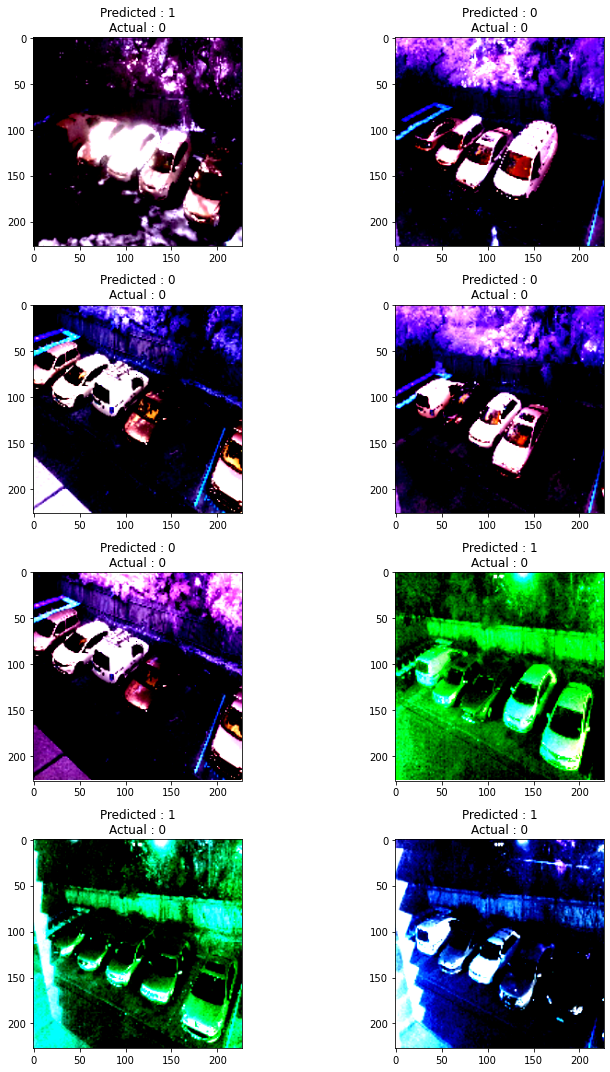

In [20]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(pred_digits[prop_class[count]])+"\n"+"Actual : "+str(np.argmax([y_test[prop_class[count]]])))
        plt.tight_layout()
        count+=1


# **Running the model on images taken from Ohio Wesleyan University's Parking Lot**

In [21]:


test_data_path = "/kaggle/input/owu-images/" #Loading image from url
owu_img_data = []
owu_img_np=[]
for owu_test_img in os.listdir(test_data_path):  
   # print(owu_test_img)
    owu_img_data.append(os.path.join(test_data_path,owu_test_img))
    test_img_arr = cv2.imread(os.path.join(test_data_path,owu_test_img))
    test_new_img_arr = cv2.resize(test_img_arr,(img_size,img_size))
    test_img = process_images(test_new_img_arr)
    test_img= tf.image.per_image_standardization(test_img) #added
    test_img = np.array(test_img).reshape(-1, 227, 227, 3) #converting rgb values into np aaray
    owu_img_np.append(test_img)

In [22]:
owu_predictions=[]
for test_img in owu_img_np: 
        owu_pred=model.predict(test_img)
        owu_pred_digits=np.argmax(owu_pred,axis=1)
        owu_predictions.append(float(owu_pred_digits))
        

# **Results**

In [23]:
owu_results = []
for pred in owu_predictions:
    if(pred == 0):
        owu_results.append("free")
    else:
        owu_results.append("full")


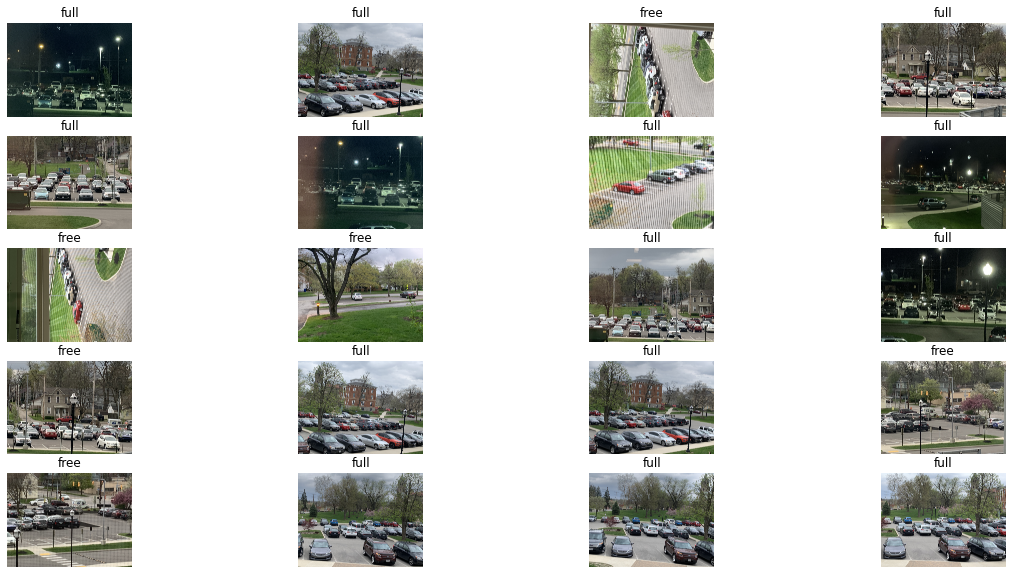

In [24]:
# create figure
fig = plt.figure(figsize=(20, 10))
k=0
for test_img in owu_img_data: 
    k = k+1
    fig.add_subplot(5,4,k)
    plt.imshow(imread(test_img))
    plt.axis('off')
    plt.title(owu_results[owu_img_data.index(test_img)])
plt.show()